In [1]:
import warnings
warnings.filterwarnings('ignore')

# m1 쓰는 사람은 안써도 되는 소스코드
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '3'

In [2]:
from tensorflow import keras
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# train과 valid 분리
from sklearn.model_selection import train_test_split

train_scaled = train_input /255.0
#train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state= 42
)

In [3]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 모델훈련시키기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5252 - accuracy: 0.8141
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3913 - accuracy: 0.8598
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3536 - accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3340 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3192 - accuracy: 0.8868


In [6]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

---
### 손실곡선

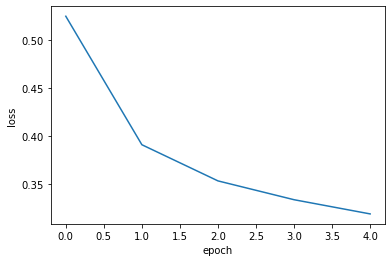

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

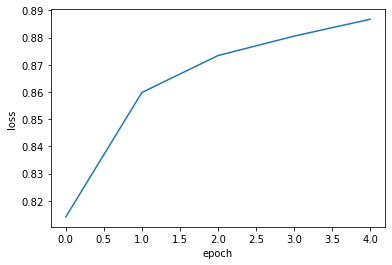

In [9]:
# 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
### 반복훈련의 증가

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5282 - accuracy: 0.8135
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8600
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3516 - accuracy: 0.8744
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3329 - accuracy: 0.8821
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3187 - accuracy: 0.8868
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3047 - accuracy: 0.8898
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2978 - accuracy: 0.8949
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2883 - accuracy: 0.8977
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2788 - accuracy: 0.9022
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.275

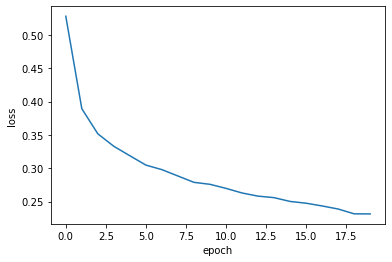

In [13]:
# epoch(20) 후 손실곡선
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

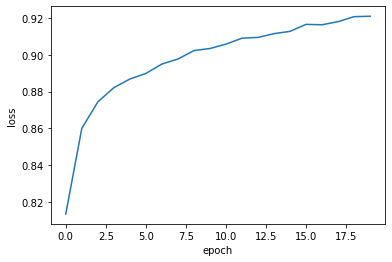

In [14]:
# 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
### 검증 손실
: 검증 세트에 대한 정혹도를 파악하기 위해 validation data를 사용한다.

In [16]:
# Validate
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5288 - accuracy: 0.8130 - val_loss: 0.4075 - val_accuracy: 0.8555
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3898 - accuracy: 0.8588 - val_loss: 0.3765 - val_accuracy: 0.8672
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3543 - accuracy: 0.8721 - val_loss: 0.3597 - val_accuracy: 0.8759
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3332 - accuracy: 0.8805 - val_loss: 0.3572 - val_accuracy: 0.8758
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3193 - accuracy: 0.8844 - val_loss: 0.3711 - val_accuracy: 0.8768
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3073 - accuracy: 0.8898 - val_loss: 0.3696 - val_accuracy: 0.8731
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2974 - accuracy: 0.8939 - val_loss: 0.3871 - val_accuracy:

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

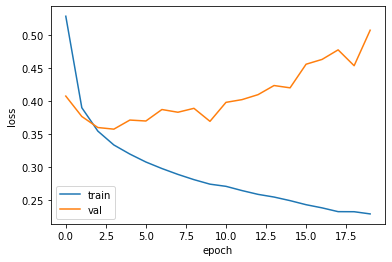

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.  

> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.

---
### Optimizer (Adam)

In [21]:
# Validate
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5216 - accuracy: 0.8168 - val_loss: 0.4238 - val_accuracy: 0.8525
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3954 - accuracy: 0.8588 - val_loss: 0.3836 - val_accuracy: 0.8598
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3543 - accuracy: 0.8714 - val_loss: 0.4075 - val_accuracy: 0.8536
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3262 - accuracy: 0.8818 - val_loss: 0.3618 - val_accuracy: 0.8713
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3055 - accuracy: 0.8870 - val_loss: 0.3588 - val_accuracy: 0.8737
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2908 - accuracy: 0.8926 - val_loss: 0.3434 - val_accuracy: 0.8779
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8981 - val_loss: 0.3321 - val_accuracy:

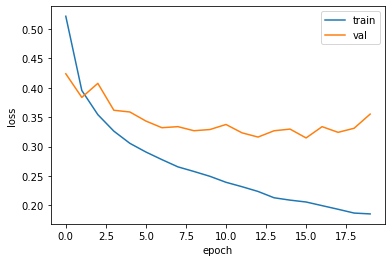

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])
plt.show()

> 훈련세트는 epochs가 증가함에 따라 손실이 떨어지고 있으나  
> 검증세트는 epochs의 증가에 따라 초반에는 손실이 떨어지나 진행하면 할수록 손실율이 증가한다.  

> 이 모델은 훈련세트에는 정확도가 높아 좋지만, 검증세트에는 적합하지 않는 과대적합 모델이다.  
> Optimizer(최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증손실에 대한 부분(과대적합)은 아직 해결이 안됨

---
## Dropout
- 머신러닝의 l1,l2 같은 딥러닝의 규제
- 신경망 모델에만 있음
- 훈련시에만 각 sample를 처리할때 은닉층의 임의의 node를 계산에 포함시키지 않는다.

In [25]:
# model의 dropout을 추가
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Validate
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5924 - accuracy: 0.7907 - val_loss: 0.4319 - val_accuracy: 0.8413
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4389 - accuracy: 0.8435 - val_loss: 0.3972 - val_accuracy: 0.8547
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4050 - accuracy: 0.8535 - val_loss: 0.3599 - val_accuracy: 0.8698
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3852 - accuracy: 0.8581 - val_loss: 0.3752 - val_accuracy: 0.8616
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3658 - accuracy: 0.8657 - val_loss: 0.3426 - val_accuracy: 0.8726
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3535 - accuracy: 0.8708 - val_loss: 0.3480 - val_accuracy: 0.8742
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3446 - accuracy: 0.8754 - val_loss: 0.3438 - val_accuracy:

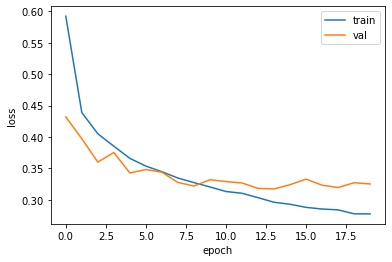

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])
plt.show()

> epochs가 10인 경우가 train과 val의 차이가 적은 것 같다  
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epochs의 갯수를 선택한다.

---
### 모델의 저장과 복원
- HDF5 format으로 저장

In [28]:
# model 저장
model.save("../Data/model-whole.h5")

In [29]:
# 복원
model = keras.models.load_model("../Data/model-whole.h5")

In [30]:
# 모델 사용
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8877


[0.3250388503074646, 0.887666642665863]

---
### Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장해 준다. <- 굉장히 편함


In [31]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb= keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb]
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5851 - accuracy: 0.7957 - val_loss: 0.4321 - val_accuracy: 0.8480
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4386 - accuracy: 0.8406 - val_loss: 0.3946 - val_accuracy: 0.8561
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4040 - accuracy: 0.8519 - val_loss: 0.3677 - val_accuracy: 0.8693
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3821 - accuracy: 0.8611 - val_loss: 0.3683 - val_accuracy: 0.8665
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3670 - accuracy: 0.8650 - val_loss: 0.3452 - val_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3507 - accuracy: 0.8696 - val_loss: 0.3383 - val_accuracy: 0.8782
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3397 - accuracy: 0.8750 - val_loss: 0.3456 - val_accuracy:

In [32]:
model = keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3253 - accuracy: 0.8860


[0.3252759873867035, 0.8859999775886536]

---
## Early-Stopping(조기종료)
- Callbacks 처럼 끝까지 기다리는 것이 아니고 hyper parameter(참는 횟수)를 선정하여 한계값을 정해 실행한다.

In [34]:
model = model_fn(keras.layers.Dropout(0.3)) # drop out 30%
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb= keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
# 2번까지 참을게 그이상은 멈추겠다. / 최적의 가중치를 저장한다.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]
)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5875 - accuracy: 0.7919 - val_loss: 0.4276 - val_accuracy: 0.8467
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4385 - accuracy: 0.8414 - val_loss: 0.3895 - val_accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4020 - accuracy: 0.8529 - val_loss: 0.3695 - val_accuracy: 0.8660
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3829 - accuracy: 0.8621 - val_loss: 0.3568 - val_accuracy: 0.8666
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3673 - accuracy: 0.8655 - val_loss: 0.3480 - val_accuracy: 0.8741
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3539 - accuracy: 0.8684 - val_loss: 0.3390 - val_accuracy: 0.8759
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3481 - accuracy: 0.8711 - val_loss: 0.3514 - val_accuracy:

In [35]:
# 몇번째 epochs에서 stop 되었는지?

early_stopping_cb.stopped_epoch

10

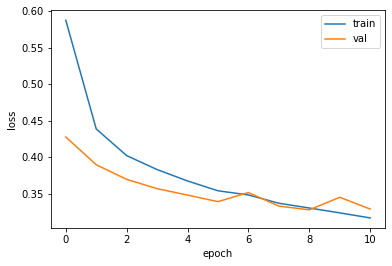

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])
plt.show()